In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle
from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

Untuk detil datanya adalah sebagai berikut:

- UpdatedAt Periode of Data taken
- customerID Customer ID
- gender Whether the customer is a male or a female (Male, Female)
- SeniorCitizen Whether the customer is a senior citizen or not (Yes, No)
- Partner Whether the customer has a partner or not (Yes, No)
- tenure Number of months the customer has stayed with the company
- PhoneService Whether the customer has a phone service or not (Yes, No)
- InternetService Customer’s internet service provider (Yes, No)
- StreamingTV Whether the customer has streaming TV or not (Yes, No)
- PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
- MonthlyCharges The amount charged to the customer monthly
- TotalCharges The total amount charged to the customer
- Churn Whether the customer churned or not (Yes, No)

In [3]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [4]:
print(df_load.customerID.nunique())

6950


In [5]:
print(df_load.shape)

(6950, 13)


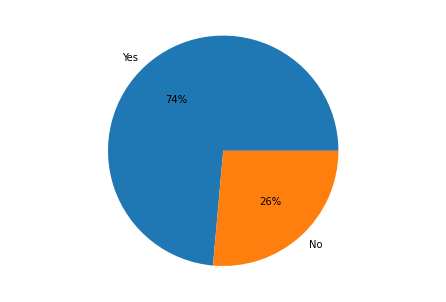

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

## Sebaran Data Churn pada tiap Data Numerik

Kita akan melakukan sebaran data histogram pada setiap data numerik 

Pelanggan yang Churn ditandai dengan warna merah, sedangkan yang tidak termasuk sebagai Churn berwarna biru

Dari visualisasi tersebut kita bisa menyimpulkan bahwa:
- untuk MonthlyCharges, ada kecenderungan pelanggan melakukan Churn jika nilai MonthlyCharges semakin besar
- untuk Tenure, ada kecenderungan semakin lama pelanggan berlangganan, maka peluang Churn akan semakin kecil

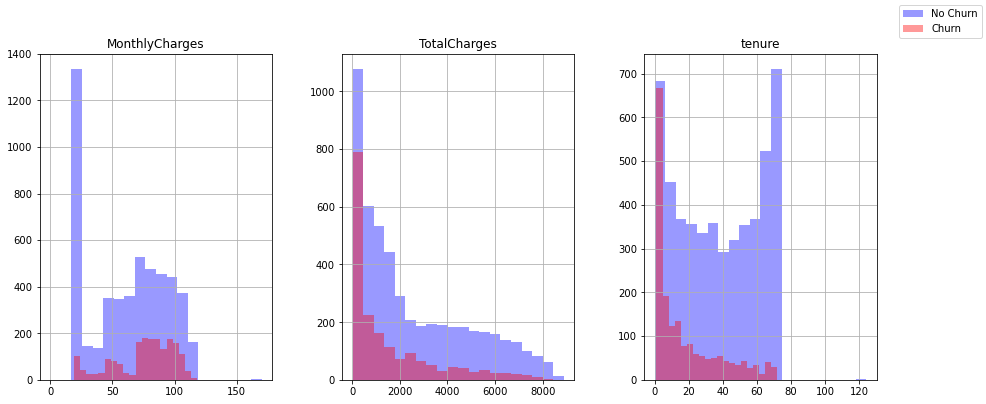

In [7]:
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and red, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.4, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='red', alpha=0.4, ax=ax)
fig.legend(labels=['No Churn','Churn'])

plt.show()

## Plotting Data Churn pada setiap Data Kategorik

Kita akan melakukan ploting data antara kolom kategorik dengan kolom Churn

Pelanggan yang memiliki kecenderungan untuk melakukan Churn adalah:
- Pelanggan yang tidak memiliki Partner
- Pelanggan yang tergolong sebagai SeniorCitizen
- Pelanggan yang memiliki layanan telepon (PhoneService)
- Pelanggann yang memiliki layanan internet (InternetService)
- Pelanggan yang tagihannya paperless (PaperlessBilling)

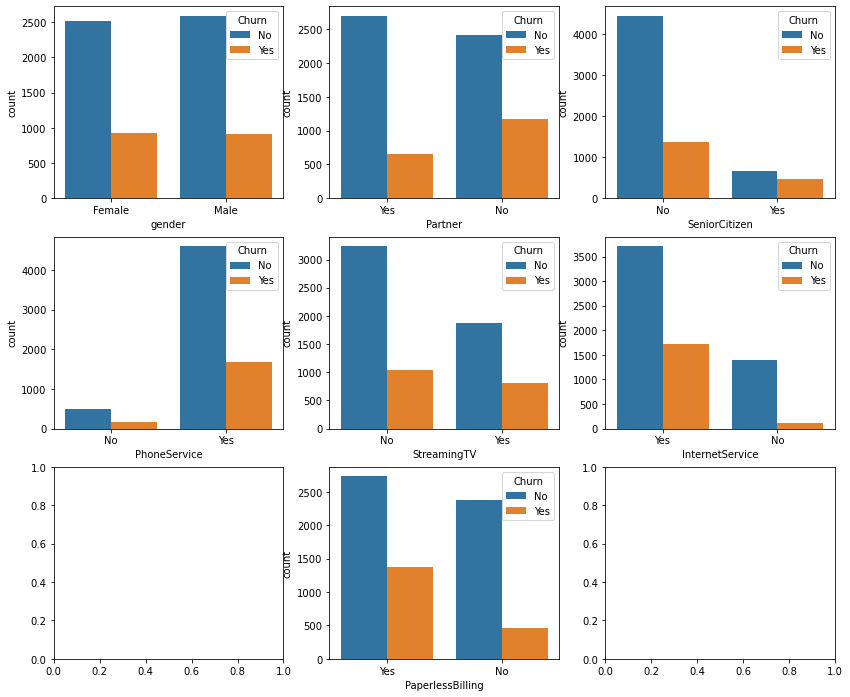

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))

sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])

plt.show()


## Drop kolom

In [9]:
cleaned_df = df_load.drop(['customerID', 'UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


## Enconding data

In [10]:
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df[column]= LabelEncoder().fit_transform(cleaned_df[column])

print(cleaned_df.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

## Splitting data

In [11]:
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape, 'sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('-'*40)
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape, 'sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
----------------------------------------
Jumlah baris dan kolom dari x_test adalah: (2085, 10) sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


## Logistic Regression Model

In [12]:
log_model = LogisticRegression().fit(X_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


C:\Users\DARWIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
y_train_pred = log_model.predict(X_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.80      0.79      4865



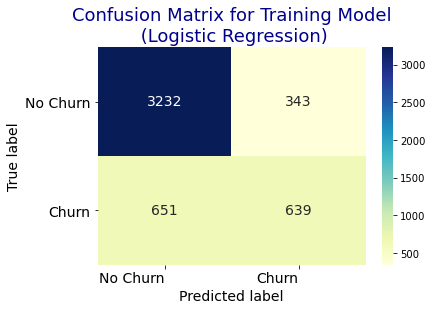

In [14]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n (Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [15]:
acc_logreg_train = accuracy_score(y_train, y_train_pred)
print("akurasi train:", accuracy_score(y_train, y_train_pred))

akurasi train: 0.7956834532374101


In [16]:
y_test_pred = log_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



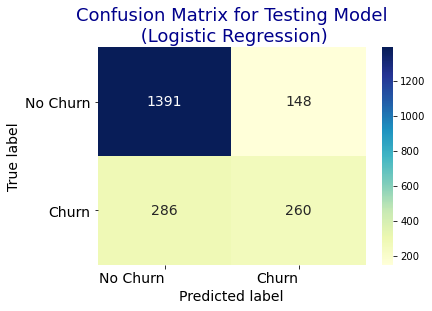

In [17]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Testing Model\n (Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [18]:
acc_logreg_test = accuracy_score(y_test, y_test_pred)
print("akurasi test:", accuracy_score(y_test, y_test_pred))

akurasi test: 0.7918465227817746


Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 264, tebakan tidak churn yang sebenernya tidak churn adalah 1392, tebakan tidak churn yang sebenernya benar churn adalah 282 dan tebakan churn yang sebenernya tidak churn adalah 146.

## Random Forest Model

In [19]:
rdf_model = RandomForestClassifier().fit(X_train, y_train)
print(rdf_model)

RandomForestClassifier()


In [20]:
y_train_pred = rdf_model.predict(X_train)
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       0.99      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



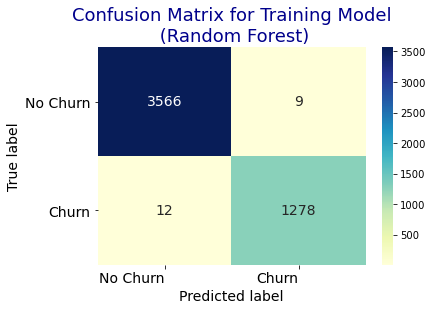

In [21]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n (Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [22]:
acc_rdf_train = accuracy_score(y_train, y_train_pred)
print("akurasi train:", accuracy_score(y_train, y_train_pred))

akurasi train: 0.99568345323741


In [23]:
y_test_pred = rdf_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1539
           1       0.58      0.47      0.52       546

    accuracy                           0.77      2085
   macro avg       0.70      0.67      0.69      2085
weighted avg       0.76      0.77      0.76      2085



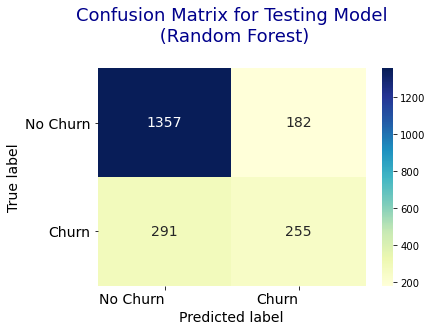

In [24]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n (Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [25]:
acc_rdf_test = accuracy_score(y_test, y_test_pred)
print("akurasi test:", accuracy_score(y_test, y_test_pred))

akurasi test: 0.7731414868105515


Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 78%, dengan detil tebakan churn yang sebenernya benar churn adalah 262, tebakan tidak churn yang sebenernya tidak churn adalah 1360, tebakan tidak churn yang sebenernya benar churn adalah 284 dan tebakan churn yang sebenernya tidak churn adalah 179.

## Gradient Boosting Model

In [26]:
gbt_model = GradientBoostingClassifier().fit(X_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


In [27]:
y_train_pred = gbt_model.predict(X_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



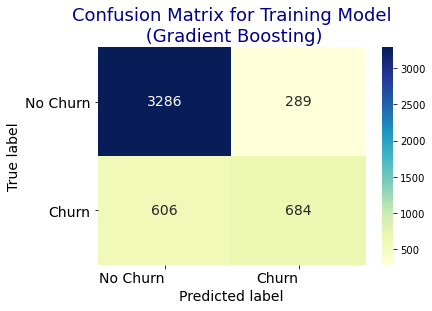

In [28]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n (Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [29]:
acc_gbt_train = accuracy_score(y_train, y_train_pred)
print("akurasi train:", accuracy_score(y_train, y_train_pred))

akurasi train: 0.816032887975334


In [30]:
y_test_pred = gbt_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



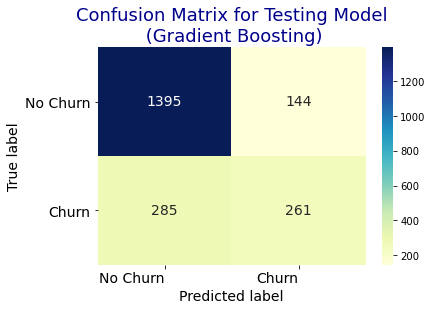

In [31]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n (Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [32]:
acc_gbt_test = accuracy_score(y_test, y_test_pred)
print("akurasi test:", accuracy_score(y_test, y_test_pred))

akurasi test: 0.7942446043165468


## Menentukan Model Terbaik

In [34]:
outside = ['Logistic Regression', 'Logistic Regression', 'Random Forest','Random Forest', 'Gradient Boosting', 'Gradient Boosting']
outside

['Logistic Regression',
 'Logistic Regression',
 'Random Forest',
 'Random Forest',
 'Gradient Boosting',
 'Gradient Boosting']

In [35]:
inside = ['train', 'test']*4
inside

['train', 'test', 'train', 'test', 'train', 'test', 'train', 'test']

In [36]:
hier_index = list(zip(outside,inside))
hier_index

[('Logistic Regression', 'train'),
 ('Logistic Regression', 'test'),
 ('Random Forest', 'train'),
 ('Random Forest', 'test'),
 ('Gradient Boosting', 'train'),
 ('Gradient Boosting', 'test')]

In [39]:
hier_index = pd.MultiIndex.from_tuples(hier_index)
df_rekap = pd.DataFrame([acc_logreg_train, acc_logreg_test, acc_rdf_train, acc_rdf_test, acc_gbt_train, acc_gbt_test], hier_index, ['Akurasi'])
df_rekap.index.names = ['Model', 'Train or Test']
df_rekap

Akurasi
Model               Train or Test          
Logistic Regression train          0.795683
                    test           0.791847
Random Forest       train          0.995683
                    test           0.773141
Gradient Boosting   train          0.816033
                    test           0.794245

Performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 80%, akurasi testing 79%)